# Analysis of Latin America authors
## For papers with less than 10 authors

<img src="https://raw.githubusercontent.com/restrepo/inspire/master/img/authors.svg" width=700>

In [106]:
%pylab inline
plt.rc('axes', axisbelow=True)

Populating the interactive namespace from numpy and matplotlib


Load the data

In [165]:
import pandas as pd
from inspirehep import hIndex
df=pd.read_json('data/inspire_LA.json')
#df=df.rename( dict(zip(df.columns,[c.replace('LA_','') for c in df.columns])) ,axis='columns')

In [166]:
df.shape

(6793, 12)

Prepare the data

In [167]:
c='Colombia'
#c=''
if c:
    dc=df[df['country']==c].reset_index(drop=True)
else:
    dc=df.copy()
#Obtain the unique list of institution of a country
ic=set(dc['institution_id'].to_list())
#Filter the papers of a country for each author
dc['country_papers']=dc['papers'].apply(lambda l: [d for d in l if d.get('inst_id') in ic])
# Extract years of the list of country papers of each author
dc['years']=dc['country_papers'].apply(lambda l: [eval(d.get('year')) for d in l if d.get('year')!='None'])
dc['year_max']=dc['years'].apply(lambda l: max(l) if l else 0)
dc['year_min']=dc['years'].apply(lambda l: min(l) if l else 0)
year_min=dc[dc['year_min']>0]['year_min'].min()
year_max=dc['year_max'].max()

## Visualizations
1. Number of active researchers of country per year

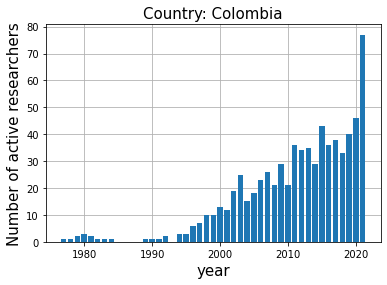

In [168]:
rs=[]
for y in range(year_min,year_max+1):
    rs.append( {'year':y, 'authors':dc[dc['years'].apply(lambda l: y in l)].shape[0]} )

rs=pd.DataFrame(rs)
rs=rs[rs['year']<year_max]

plt.bar(rs['year'],rs['authors'])
plt.ylabel('Number of active researchers',size=15)
plt.xlabel('year',size=15)
plt.title(f'Country: {c}',size=15)
plt.grid()

2. Number of papers of country per year and h-index of country

In [169]:
ctp=pd.DataFrame( list(dc['country_papers'].apply(pd.Series).stack().values) ).drop_duplicates().reset_index(drop=True)

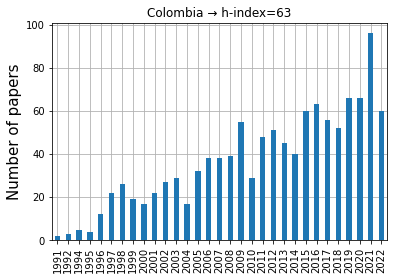

In [170]:
kk=ctp[ctp['year'].apply(eval)>1990]['year'].value_counts().sort_index().plot(kind='bar')
plt.grid()
plt.title(f'{c} → h-index={hIndex(ctp.citation_count)}')
plt.ylabel('Number of papers',size=15)
plt.savefig('brazil.png')

In [153]:
import pandas as pd
from inspirehep import hIndex
df=pd.read_json('inspire_LA.json')
#df=df.rename( dict(zip(df.columns,[c.replace('LA_','') for c in df.columns])) ,axis='columns')

In [154]:
df.shape

(6841, 11)

In [132]:
df[df.papers.str[0].str['year']=='0000'].shape

(11, 11)

In [133]:
df[:1]

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1030697,"{'value': 'Vasconcellos, Cesar Augusto Zen', '...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'C.A.Z.Vasconcellos.1', 'schema': '...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."


In [146]:
df.shape

(6303, 11)

In [150]:
df.name.iloc[0]

{'value': 'Vasconcellos, Cesar Augusto Zen',
 'preferred_name': 'Cesar Augusto Zen Vasconcellos'}

Prepare the data

In [155]:
c='Colombia'
#c=''
if c:
    dc=df[df['country']==c].reset_index(drop=True)
else:
    dc=df.copy()
#Obtain the unique list of institution of a country
ic=set(dc['institution_id'].to_list())
#Filter the papers of a country for each author
dc['country_papers']=dc['papers'].apply(lambda l: [d for d in l if d.get('inst_id') in ic])
# Extract years of the list of country papers of each author
dc['years']=dc['country_papers'].apply(lambda l: [eval(d.get('year')) for d in l if d.get('year')!='None'])
dc['year_max']=dc['years'].apply(lambda l: max(l) if l else 0)
dc['year_min']=dc['years'].apply(lambda l: min(l) if l else 0)
year_min=dc[dc['year_min']>0]['year_min'].min()
year_max=dc['year_max'].max()

## Visualizations
1. Number of active researchers of country per year

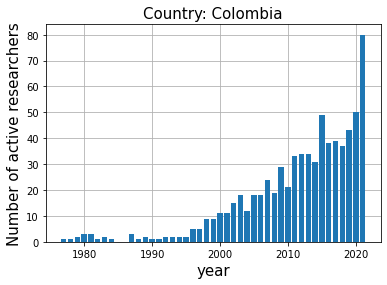

In [156]:
rs=[]
for y in range(year_min,year_max+1):
    rs.append( {'year':y, 'authors':dc[dc['years'].apply(lambda l: y in l)].shape[0]} )

rs=pd.DataFrame(rs)
rs=rs[rs['year']<year_max]

plt.bar(rs['year'],rs['authors'])
plt.ylabel('Number of active researchers',size=15)
plt.xlabel('year',size=15)
plt.title(f'Country: {c}',size=15)
plt.grid()

2. Number of papers of country per year and h-index of country

In [157]:
ctp=pd.DataFrame( list(dc['country_papers'].apply(pd.Series).stack().values) )#.drop_duplicates().reset_index(drop=True)

Text(0, 0.5, 'Number of papers')

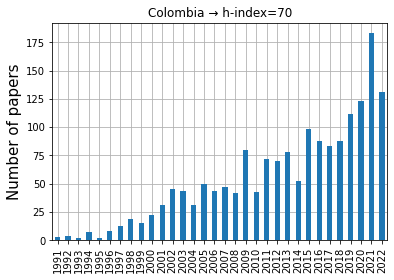

In [158]:
kk=ctp[ctp['year'].apply(eval)>1990]['year'].value_counts().sort_index().plot(kind='bar')
plt.grid()
plt.title(f'{c} → h-index={hIndex(ctp.citation_count)}')
plt.ylabel('Number of papers',size=15)

In [ ]:
#Obtain the unique list of institution of a country
ic=set(dc['institution_id'].to_list())
#Filter the papers of a country for each author
dc['country_papers']=dc['papers'].apply(lambda l: [d for d in l if d.get('inst_id') in ic])


By institution

In [85]:
i='Sao Paulo U.'
di=df[df['institution']=='Sao Paulo U.'].reset_index(drop=True)

In [86]:
ii=di['institution_id'].unique()

In [87]:
di['institution_papers']=di['papers'].apply(lambda l: [d for d in l if d.get('inst_id') in ii])

In [88]:
itp=pd.DataFrame( list(di['institution_papers'].apply(pd.Series).stack().values) )#.drop_duplicates().reset_index(drop=True)

In [89]:
itp=itp.drop_duplicates(subset=['recid'])
itp.shape

(2898, 5)

Text(0, 0.5, 'Number of papers')

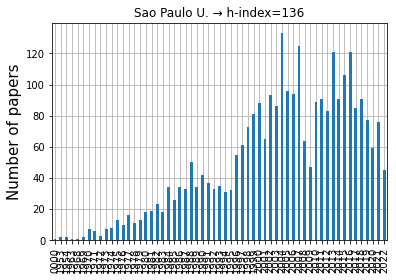

In [90]:
kk=itp['year'].value_counts().sort_index().plot(kind='bar')
plt.grid()
plt.title(f'{i} → h-index={hIndex(ctp.citation_count)}')
plt.ylabel('Number of papers',size=15)

In [1]:
import json

In [4]:
import pickle

In [5]:
f=open('inspire_LA.pickle','rb')
db=pickle.load(f)
f.close()

AttributeError: Can't get attribute 'institutions' on <module '__main__'>